# Критерий согласия для проверки простой непараметрической гипотезы

In [62]:
A = 2
D = 5
n = 250

#### При A = 2 выборка получена из закона распределения, совпадающего с распределением η=1-$\sqrtξ$ , ξ~R[0,1] 

#### Метрика $D5(n,l)=\sum_j\frac{(\nu_j-np_j)^2}{np_j(n - np_j)}$

## 0. Импорт нужных библиотек

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Markdown as md
from IPython.display import Latex
import math
import scipy
import warnings
warnings.filterwarnings("ignore")

## 1. Моделирование выборки, подчиняющейся основной гипотезе

In [64]:
m = 20000

x = np.zeros((m, n), dtype=float)
for i in range(m):
    x[i] = np.random.uniform(0, 1, size=n)
    
x = 1 - np.sqrt(x)
print(x[1])

[2.01338496e-01 2.58776746e-03 1.21568043e-01 1.00558134e-02
 3.80278486e-01 7.95360229e-03 2.30451271e-01 1.90570609e-01
 1.29384348e-01 2.12362243e-01 1.89100846e-04 2.68064383e-01
 4.09444374e-01 8.28040402e-01 3.08372885e-01 2.21204091e-02
 4.45510714e-02 4.56010705e-01 1.22110392e-01 6.97645555e-02
 5.29785690e-01 1.91371623e-02 4.65114917e-01 1.08807498e-01
 4.18996627e-01 1.35000559e-01 8.85904360e-01 7.01873692e-01
 1.85476922e-01 2.70926340e-01 1.60738638e-01 5.78793575e-01
 7.23830831e-01 8.95924945e-01 8.10205516e-02 2.10980157e-02
 2.62692394e-01 5.30869436e-01 5.37803286e-01 2.09033163e-01
 7.74411736e-01 5.02043928e-01 9.78059447e-02 7.75367866e-01
 1.75916495e-01 3.33882800e-01 1.09413061e-01 2.03260837e-01
 4.94771044e-01 1.34931249e-01 1.60484735e-01 3.67930405e-01
 1.81849024e-01 2.48538626e-01 2.72480516e-01 1.27812814e-01
 6.67257095e-01 1.26168006e-02 2.34512247e-01 4.25571938e-01
 3.08730689e-01 7.84231921e-01 3.08456398e-01 2.80101800e-01
 2.34102251e-01 1.075022

## 2. Функция распределения, соответствующая основной гипотезе

$$η=1-\sqrtξ , ξ \in [0,1] $$

$$p_ξ(x) = 1$$

$$g(x) = 1 - \sqrt x => g^{-1}(y) = (1 - y)^2$$

$$p_η(y) = p_ξ(g^{-1}(y)) * |(g^{-1}(y))^{'}| = 2 |y - 1| =>$$

$$F_η(y) = 2y - y^2, y \in [0, 1]$$

## 3. Формирование интервалов

In [65]:
l = math.trunc(1+math.log(n,2))
xn = np.linspace(0, 1, l + 1)

def F(y):
    return 2 * y - y ** 2

npi = (F(xn)[1:] - F(xn)[:-1]) * n
md(f'Количество интервалов: $l = \lfloor 1+log_2n \\rfloor = {l}$')

Количество интервалов: $l = \lfloor 1+log_2n \rfloor = 8$

In [66]:
nui = np.zeros(m * l).reshape(m, l)
for i in range(m):
    grouped = np.histogram(x[i], xn)[0]
    nui[i] = np.array(grouped)
    
df = pd.DataFrame()
intervals = np.round(np.linspace(0,1,l+1), 7)
interval_rows = ['[{}, {})'.format(intervals[val], intervals[val+1]) for val in range(len(intervals)-2)]
interval_rows.append('[{}, {}]'.format(intervals[-2], intervals[-1]))
df['Интервалы'] = interval_rows
df['$np_i$'] = npi

for i in range(m):
    df[f'{i + 1}) $\nu_i$'] = nui[i]

df.transpose()

,0,1,2,3,4,5,6,7
Интервалы,"[0.0, 0.125)","[0.125, 0.25)","[0.25, 0.375)","[0.375, 0.5)","[0.5, 0.625)","[0.625, 0.75)","[0.75, 0.875)","[0.875, 1.0]"
$np_i$,58.59375,50.78125,42.96875,35.15625,27.34375,19.53125,11.71875,3.90625
1) $\nu_i$,56.0,47.0,49.0,36.0,24.0,19.0,13.0,6.0
2) $\nu_i$,62.0,57.0,47.0,40.0,18.0,11.0,11.0,4.0
3) $\nu_i$,50.0,49.0,40.0,40.0,26.0,24.0,20.0,1.0
...,...,...,...,...,...,...,...,...
19996) $\nu_i$,54.0,49.0,50.0,43.0,25.0,18.0,10.0,1.0
19997) $\nu_i$,63.0,49.0,32.0,37.0,32.0,17.0,16.0,4.0
19998) $\nu_i$,80.0,40.0,47.0,37.0,22.0,19.0,4.0,1.0
19999) $\nu_i$,64.0,41.0,56.0,36.0,26.0,14.0,12.0,1.0


## 4. Вычисление метрик для сгенерированных выборок

In [67]:
D = np.zeros(m)
for i in range(m):
    D[i] = np.sum((nui[i]-npi) ** 2 / npi/(n-npi))

D.sort() # сортируем по возрастанию
print(D)

[0.00116488 0.00129913 0.00137216 ... 0.16016535 0.16395956 0.18869845]


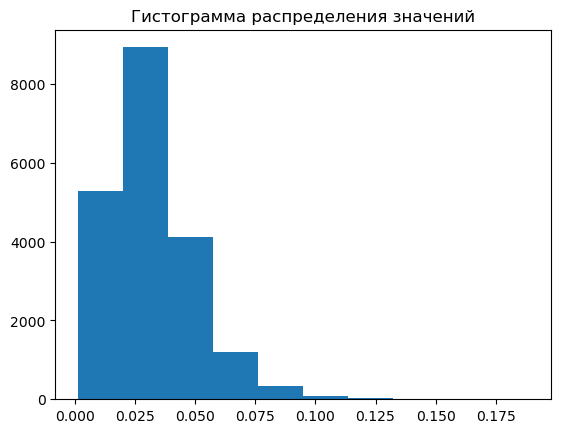

In [68]:
plt.hist(D);
plt.title('Гистограмма распределения значений')
plt.show()

## 5. Эмпирические квантили для различных уровней значимости

In [69]:
alpha = [0.01, 0.05, 0.1]
D_alpha = [0, 0, 0]
i = 0
res = ''
for al in alpha:
    D_alpha[i] = D[math.trunc(m * (1 - al))] 
    i += 1
    res += f'$D_{{кр}}({al}) = D[{math.trunc(m * (1 - al))}] = {round(D_alpha[i - 1], 3)}$<br>'
    
md(res)

$D_{кр}(0.01) = D[19800] = 0.086$<br>$D_{кр}(0.05) = D[19000] = 0.064$<br>$D_{кр}(0.1) = D[18000] = 0.055$<br>

## 6. Тестирование критерия для различных выборок:

### 6.1	Протестируем критерий на выборке, полученной из распределения R[0; 1]  (A = 0). Для этого сгенерируем выборку, найдем эмпирические частоты и вычислим статистику.


In [70]:
x1 = np.random.uniform(0, 1, size=n)
nui1 = np.histogram(x1, xn)[0]
D1 = np.sum((nui1-npi)**2 / npi/(n - npi))


,0,1,2,3,4,5,6,7,8,9
Интервал,0.107559,0.20631,0.305061,0.403812,0.502563,0.601314,0.700065,0.798816,0.897567,0.996318
Количество значений,22.000000,28.00000,26.000000,24.000000,26.000000,27.000000,23.000000,26.000000,19.000000,29.000000


        Интервал  Количество значений
count  10.000000            10.000000
mean    0.551939            25.000000
std     0.298983             3.018462
min     0.107559            19.000000
25%     0.329749            23.250000
50%     0.551939            26.000000
75%     0.774128            26.750000
max     0.996318            29.000000


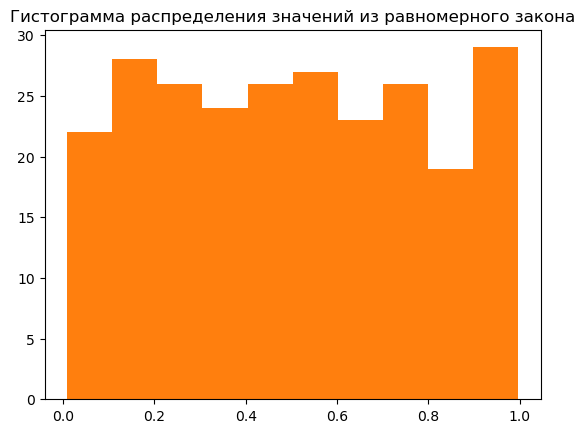

In [71]:
counts, bins, bars = plt.hist(x1)

data = pd.DataFrame(columns = range(10), index=['Интервал', 'Количество значений'], data=[bins[1:], counts])
display(data)
print(data.transpose().describe())
plt.hist(x1);
plt.title('Гистограмма распределения значений из равномерного закона')
plt.show()

In [72]:
md(f'${D1} > D_{{кр}}(\\alpha), \\forall \\alpha \\in [0.01, 0.05, 0.1]$')

$1.0930861546955675 > D_{кр}(\alpha), \forall \alpha \in [0.01, 0.05, 0.1]$

#### Из этого делаем вывод, что гипотеза о том, что данная выборка распределена по η=1- $\sqrtξ$ , ξ~R[0,1], отвергается.

### 6.2 	Протестируем критерий на выборке, полученной из распределения η= $\sqrt ξ$, ξ~R[0,1] (A=1) Для этого сгенерируем выборку из равноменрого закона, найдем эмпирические частоты и вычислим статистику.


In [73]:
x2 = np.random.uniform(0, 1, size=n)
x2 = np.sqrt(x2)
nui2 = np.histogram(x2, xn)[0]
D2 = np.sum((nui2-npi)**2 / npi/(n-npi))


,0,1,2,3,4,5,6,7,8,9
Интервал,0.134999,0.231076,0.327153,0.42323,0.519307,0.615384,0.711461,0.807538,0.903615,0.999692
Количество значений,3.000000,4.000000,16.000000,20.00000,24.000000,25.000000,33.000000,33.000000,50.000000,42.000000


        Интервал  Количество значений
count  10.000000            10.000000
mean    0.567345            25.000000
std     0.290888            15.180397
min     0.134999             3.000000
25%     0.351172            17.000000
50%     0.567345            24.500000
75%     0.783519            33.000000
max     0.999692            50.000000


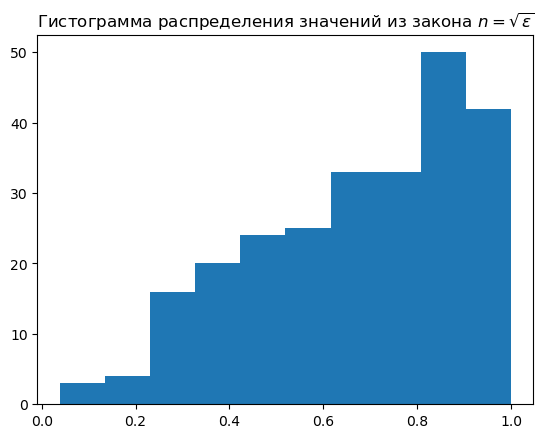

In [74]:

counts, bins, bars = plt.hist(x2);
data = pd.DataFrame(columns = range(10), index=['Интервал', 'Количество значений'], data=[bins[1:], counts])
display(data)
print(data.transpose().describe())

plt.title('Гистограмма распределения значений из закона $n=\sqrt{\epsilon}$')
plt.show()

In [75]:
md(f'${D2} > D_{{кр}}(\\alpha), \\forall \\alpha \\in [0.01, 0.05, 0.1]$')

$4.328648102023741 > D_{кр}(\alpha), \forall \alpha \in [0.01, 0.05, 0.1]$

#### Из этого делаем вывод, что гипотеза о том, что данная выборка распределена по η=1- $\sqrtξ$ , ξ~R[0,1], отвергается.

### 6.3	Протестируем критерий на выборке, полученной из бэта-распределения с параметрами d1 = 10, d2 = 20. Для этого сгенерируем выборку, найдем эмпирические частоты и вычислим статистику.

In [76]:
x3 = scipy.stats.beta.rvs(10, 20, size=n)
nui3 = np.histogram(x3, xn)[0]
D3 = np.sum((nui3-npi)**2 / npi/(n-npi))


,0,1,2,3,4,5,6,7,8,9
Интервал,0.154781,0.201435,0.248088,0.294741,0.341394,0.388048,0.434701,0.481354,0.528008,0.574661
Количество значений,4.000000,9.000000,30.000000,52.000000,50.000000,37.000000,41.000000,17.000000,7.000000,3.000000


        Интервал  Количество значений
count  10.000000            10.000000
mean    0.364721            25.000000
std     0.141250            19.287302
min     0.154781             3.000000
25%     0.259751             7.500000
50%     0.364721            23.500000
75%     0.469691            40.000000
max     0.574661            52.000000


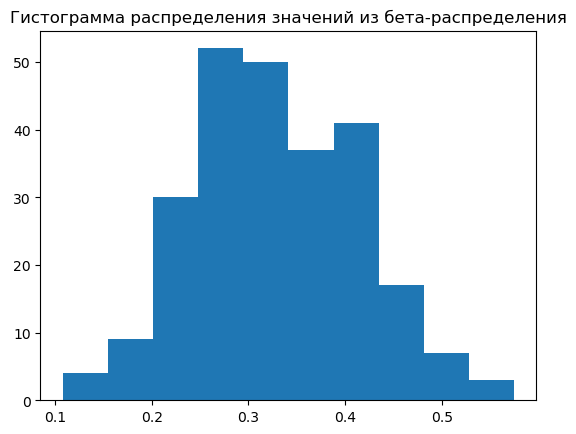

In [77]:


counts, bins, bars = plt.hist(x3);
data = pd.DataFrame(columns = range(10), index=['Интервал', 'Количество значений'], data=[bins[1:], counts])
display(data)
print(data.transpose().describe())

plt.title('Гистограмма распределения значений из бета-распределения')
plt.show()

In [78]:
md(f'${D3} > D_{{кр}}(\\alpha), \\forall \\alpha \\in [0.01, 0.05, 0.1]$')

$1.4660738663440447 > D_{кр}(\alpha), \forall \alpha \in [0.01, 0.05, 0.1]$

#### Из этого делаем вывод, что гипотеза о том, что данная выборка распределена по η=1- $\sqrtξ$ , ξ~R[0,1], отвергается.

### 6.4	Протестируем критерий на выборке, полученной из исходного закона. Для этого сгенерируем выборку, найдем эмпирические частоты и вычислим статистику.

In [79]:
x4 = np.random.uniform(0, 1, size=n)
x4 = 1 - np.sqrt(x4)
nui4 = np.histogram(x4, xn)[0]
D4 = np.sum((nui4-npi)**2 / npi/(n - npi))


,0,1,2,3,4,5,6,7,8,9
Интервал,0.098211,0.194933,0.291655,0.388376,0.485098,0.58182,0.678542,0.775264,0.871985,0.968707
Количество значений,44.000000,44.000000,37.000000,36.000000,29.000000,19.00000,16.000000,15.000000,6.000000,4.000000


        Интервал  Количество значений
count  10.000000            10.000000
mean    0.533459            25.000000
std     0.292840            14.988885
min     0.098211             4.000000
25%     0.315835            15.250000
50%     0.533459            24.000000
75%     0.751083            36.750000
max     0.968707            44.000000


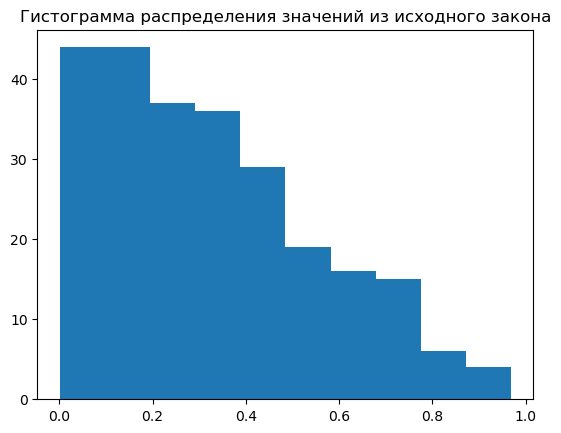

In [80]:
counts, bins, bars = plt.hist(x4);
data = pd.DataFrame(columns = range(10), index=['Интервал', 'Количество значений'], data=[bins[1:], counts])
display(data)
print(data.transpose().describe())

plt.title('Гистограмма распределения значений из исходного закона')
plt.show()

In [81]:
md(f'${D4} < D_{{кр}}(\\alpha), \\forall \\alpha \\in [0.01, 0.05, 0.1]$')

$0.011343783638827046 < D_{кр}(\alpha), \forall \alpha \in [0.01, 0.05, 0.1]$

#### Из этого делаем вывод, что гипотеза о том, что данная выборка распределена по η=1- $\sqrtξ$ , ξ~R[0,1], принимается.

## 7. Вывод

#### На основе стохастического эксперимента был построен критерий согласия для проверки простой гипотезы. Критерий был проверен на трех выборках распределенных не в соответствие с основной гипотезой, и для каждой из них основную гипотезу отклонил, что говорит в пользу критерия. Кроме того, критерий был проверен на выборке, распределенной в соответствие с основной гипотезой. Для этого случая была получена статистика, меньшая каждого из уровней доверия, и основная гипотеза была принята, что также говорит в пользу критерия.